### Text Classification with RNN

In [1]:
# importing libraries

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
import matplotlib.pyplot as plt
%matplotlib inline

###### Defining the Hyperparameter

In [3]:
vocab_size = 5000      # representing the size of the vocabulary
embedding_dim = 64     # specifying the dimensionality of the word embeddings
max_length = 200       # indicating the maximum length of input sequences
padding_type = 'post'  # specifying that padding should be added at the end of sequences
trunc_type = 'post'    # indicating that truncation should be applied at the end of sequences
oov_tok = '<OOV>'      # representing the token to be used for out-of-vocabulary words
training_portion = .8  # representing the proportion of data to be used for training

##### Preprocessing the Data and Printing the Lengths of the Labels and Articles Lists.

- Define two empty lists, articles, and labels to store the articles and labels, respectively
- Read the contents of the **bbc-text.csv** file using csv.reader and iterate through each row
- Extract the label from the first column of each row and append it to the labels list
- Process the article from the second column by removing stopwords and replacing consecutive spaces with a single space and then append it to the articles list
- Print the lengths of the labels and articles lists to display the number of labels and processed articles, respectively

In [4]:
articles = []
labels = []

In [5]:
articles = []
labels = []

with open("bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(labels))
print(len(articles))

2225
2225


__Observations:__
- There are only **2,225** articles in the data.
- Then, we split into a training set and validation set, according to the parameter we set earlier, 80% for training, and 20% for validation.

###### Splitting the Data into Training and Validation Sets
- Calculate the **train_size** by multiplying the length of the articles list with __training_portion__ and converting it to an integer
- Create **train_articles** by slicing the articles list from index **0** to **train_size**
- Create **train_labels** by slicing the labels list from index** 0 **to **train_size**
- Create validation_articles by slicing the articles list from **train_size** onward
- Create **validation_labels** by slicing the labels list from **train_size** onward
- Print the **train_size** to display the calculated value

- The lengths of **train_articles**, **train_labels**, **validation_articles**, and **validation_labels** represent the number of items in each list.

In [6]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

1780
1780
1780
445
445


__Observations:__
- The value of **train_size** is calculated based on the proportion of training data.
- The lengths of **train_articles**, **train_labels**, **validation_articles**, and **validation_labels** representing the number of items in each list.

###### Initializing a Tokenizer and Fitting It on the Training Articles

- Initialize a **Tokenizer** object named tokenizer with the specified parameters: **num_words** representing the vocabulary size and **oov_token** representing the out-of-vocabulary token
- Fit the tokenizer on the training articles **(train_articles)** using the **fit_on_texts** method
- This step updates the tokenizer's internal word index based on the words in the training articles
- Assign the word index obtained from the tokenizer to the variable **word_index**
- Extract the first 10 items from the word_index dictionary
- Print the resulting dictionary

In [7]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index

In [8]:
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'said': 2,
 'mr': 3,
 'would': 4,
 'year': 5,
 'also': 6,
 'people': 7,
 'new': 8,
 'us': 9,
 'one': 10}

__Observations:__
- The code prints a dictionary containing the first 10 items from the word_index dictionary.
- These items represent a subset of the word-to-index mappings generated by the tokenizer.

###### Converting the Training Articles into Sequences Using the Tokenizer
- Convert the training articles **(train_articles)** into sequences using the **texts_to_sequences** method of the tokenizer object and assign the result to **train_sequences**
- Print the sequence representation of the 11th training article (index 10) by accessing **train_sequences[10]**

In [9]:
train_sequences = tokenizer.texts_to_sequences(train_articles)

print(train_sequences[10])

[2432, 1, 225, 4995, 22, 641, 586, 225, 4995, 1, 1, 1661, 1, 1, 2432, 22, 564, 1, 1, 140, 278, 1, 140, 278, 796, 822, 662, 2308, 1, 1144, 1692, 1, 1720, 4996, 1, 1, 1, 1, 1, 4738, 1, 1, 122, 4514, 1, 2, 2874, 1504, 352, 4739, 1, 52, 341, 1, 352, 2171, 3961, 41, 22, 3794, 1, 1, 1, 1, 542, 1, 1, 1, 835, 631, 2367, 347, 4740, 1, 365, 22, 1, 787, 2368, 1, 4302, 138, 10, 1, 3664, 682, 3531, 1, 22, 1, 414, 822, 662, 1, 90, 13, 633, 1, 225, 4995, 1, 600, 1, 1692, 1021, 1, 4997, 807, 1863, 117, 1, 1, 1, 2974, 22, 1, 99, 278, 1, 1607, 4998, 542, 492, 1, 1444, 4741, 778, 1320, 1, 1860, 10, 33, 641, 319, 1, 62, 478, 564, 301, 1505, 22, 479, 1, 1, 1664, 1, 797, 1, 3067, 1, 1364, 6, 1, 2432, 564, 22, 2971, 4735, 1, 1, 1, 1, 1, 850, 39, 1824, 675, 297, 26, 979, 1, 882, 22, 361, 22, 13, 301, 1505, 1342, 374, 20, 63, 883, 1096, 4303, 247]


__Observation:__
- The code prints the sequence representation of the 11th training article (index 10) in the **train_sequences** list.
- The output is a list of integers, where each integer represents the index of a word in the tokenizer's word index vocabulary that corresponds to a word in the article.

###### Padding the Sequence
- Pad the sequences in **train_sequences** using the **pad_sequences** function
- Set the maximum length of the padded sequences to **max_length**
- Specify the padding type as **padding_type** and the truncation type as **trunc_type**
- Assign the padded sequences to the variable **train_padded**

In [10]:
train_padded = pad_sequences(train_sequences, maxlen=max_length,
                            padding=padding_type, truncating=trunc_type)

In [11]:
print(train_sequences[10])

[2432, 1, 225, 4995, 22, 641, 586, 225, 4995, 1, 1, 1661, 1, 1, 2432, 22, 564, 1, 1, 140, 278, 1, 140, 278, 796, 822, 662, 2308, 1, 1144, 1692, 1, 1720, 4996, 1, 1, 1, 1, 1, 4738, 1, 1, 122, 4514, 1, 2, 2874, 1504, 352, 4739, 1, 52, 341, 1, 352, 2171, 3961, 41, 22, 3794, 1, 1, 1, 1, 542, 1, 1, 1, 835, 631, 2367, 347, 4740, 1, 365, 22, 1, 787, 2368, 1, 4302, 138, 10, 1, 3664, 682, 3531, 1, 22, 1, 414, 822, 662, 1, 90, 13, 633, 1, 225, 4995, 1, 600, 1, 1692, 1021, 1, 4997, 807, 1863, 117, 1, 1, 1, 2974, 22, 1, 99, 278, 1, 1607, 4998, 542, 492, 1, 1444, 4741, 778, 1320, 1, 1860, 10, 33, 641, 319, 1, 62, 478, 564, 301, 1505, 22, 479, 1, 1, 1664, 1, 797, 1, 3067, 1, 1364, 6, 1, 2432, 564, 22, 2971, 4735, 1, 1, 1, 1, 1, 850, 39, 1824, 675, 297, 26, 979, 1, 882, 22, 361, 22, 13, 301, 1505, 1342, 374, 20, 63, 883, 1096, 4303, 247]


__Observations:__
- The code prints the sequence representation of the 11th training article (index 10) in the **train_sequences** list.
- The output is a list of integers, where each integer represents the index of a word in the tokenizer's word index vocabulary that corresponds to a word in the article.

In [12]:
print(train_padded[10])

[2432    1  225 4995   22  641  586  225 4995    1    1 1661    1    1
 2432   22  564    1    1  140  278    1  140  278  796  822  662 2308
    1 1144 1692    1 1720 4996    1    1    1    1    1 4738    1    1
  122 4514    1    2 2874 1504  352 4739    1   52  341    1  352 2171
 3961   41   22 3794    1    1    1    1  542    1    1    1  835  631
 2367  347 4740    1  365   22    1  787 2368    1 4302  138   10    1
 3664  682 3531    1   22    1  414  822  662    1   90   13  633    1
  225 4995    1  600    1 1692 1021    1 4997  807 1863  117    1    1
    1 2974   22    1   99  278    1 1607 4998  542  492    1 1444 4741
  778 1320    1 1860   10   33  641  319    1   62  478  564  301 1505
   22  479    1    1 1664    1  797    1 3067    1 1364    6    1 2432
  564   22 2971 4735    1    1    1    1    1  850   39 1824  675  297
   26  979    1  882   22  361   22   13  301 1505 1342  374   20   63
  883 1096 4303  247    0    0    0    0    0    0    0    0    0    0
    0 

__Observation:__
- The code prints the padded sequence representation of the 11th training article.
- The output is a list of integers representing the word indices of the corresponding words in the article, after applying padding to ensure a consistent length (max_length) for all sequences.

###### Printing the Length of Validation Sequences and the Shape of Validation Padded
- Convert the validation articles into sequences using the tokenizer and pad the sequences to a maximum length. Assign the result to **validation_padded**
- Print the length of **validation_sequences** and the shape of **validation_padded**
- Create a tokenizer for the labels and fit it on the labels list
- Convert the training and validation labels into sequences using the label tokenizer and store the results in **training_label_seq** and **validation_label_seq** as NumPy arrays

In [13]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences,
                                 maxlen=max_length, 
                                 padding=padding_type,
                                 truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 200)


__Observations:__
- The length of **validation_sequences**, indicating the number of sequences in the validation set.
- The shape of **validation_padded**, representing the dimensions of the padded validation sequences.

In [14]:
print(set(labels))

{'sport', 'tech', 'politics', 'business', 'entertainment'}


In [15]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

train_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

__Observations:__
- The output of this code is the conversion of label sequences for the training and validation sets.
- The **training_label_seq** and **validation_label_seq** are NumPy arrays containing the label sequences for the respective sets, based on the word index mapping generated by the **label_tokenizer**

###### Training the Model
- Create a sequential model using **tf.keras.Sequential()**
- Add an embedding layer to the model with the specified vocabulary size **(vocab_size)** and embedding dimension **(embedding_dim)**
- Add a bidirectional SimpleRNN layer to the model with the same embedding dimension
- Add a dense layer to the model with the embedding dimension as the number of units and **relu** activation function
- Add a dense layer with 6 units and the **softmax** activation function to the model
- Print a summary of the model's architecture using **model.summary()**

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          320000    
                                                                 
 bidirectional (Bidirection  (None, 128)               16512     
 al)                                                             
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 345158 (1.32 MB)
Trainable params: 345158 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###### Compiling the Model
- Compile the model using **model.compile()** with the loss function set to **sparse_categorical_crossentropy**, the optimizer set to **adam**, and the metrics set to **accuracy**
- Set the number of epochs to 10
- Train the model using **model.fit()** with the training padded sequences **(train_padded)** and training label sequences **(training_label_seq)**
- Specify the number of epochs as **num_epochs**, the validation data as the validation padded sequences **(validation_padded)** and validation label sequences **(validation_label_seq)**, and **verbose** mode as **2**

In [18]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [19]:
num_epoch = 10
history = model.fit(train_padded, train_label_seq, epochs=num_epoch,
                   validation_data=(validation_padded, validation_label_seq))

Epoch 1/10


56/56 [==============================] - 13s 124ms/step - loss: 1.6068 - accuracy: 0.2388 - val_loss: 1.5174 - val_accuracy: 0.3101
Epoch 2/10
56/56 [==============================] - 6s 115ms/step - loss: 1.4019 - accuracy: 0.4573 - val_loss: 1.3924 - val_accuracy: 0.4022
Epoch 3/10
56/56 [==============================] - 6s 114ms/step - loss: 0.7072 - accuracy: 0.8348 - val_loss: 0.8520 - val_accuracy: 0.6944
Epoch 4/10
56/56 [==============================] - 7s 131ms/step - loss: 0.0571 - accuracy: 0.9938 - val_loss: 0.7237 - val_accuracy: 0.7438
Epoch 5/10
56/56 [==============================] - 6s 102ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.6254 - val_accuracy: 0.7820
Epoch 6/10
56/56 [==============================] - 6s 112ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.6150 - val_accuracy: 0.7843
Epoch 7/10
56/56 [==============================] - 6s 113ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.6195 - val_accuracy: 0.7798
Epo

###### Plotting the Graph
- Define a function named **plot_graphs** that takes history and string as inputs. Inside the function, plot the training and validation values of the given metric (string) from the history object using **plt.plot()**
- Set the x-axis label as **Epochs** and the y-axis label as the given metric (string)
- Call the **plot_graphs** function twice, first with **history** and **accuracy** as arguments, and then with **history** and **loss** as arguments
- Display the generated plots showing the training and validation values of the accuracy and loss metrics over the epochs

In [20]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

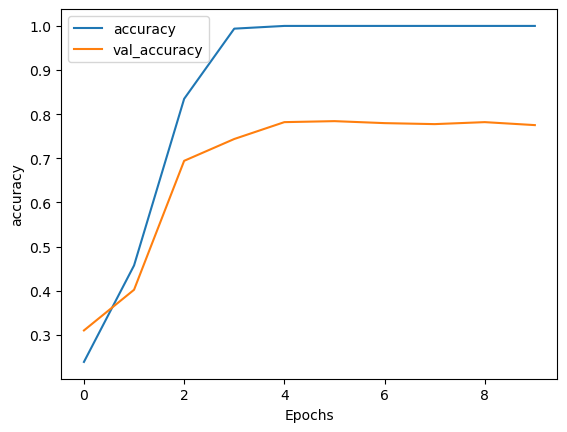

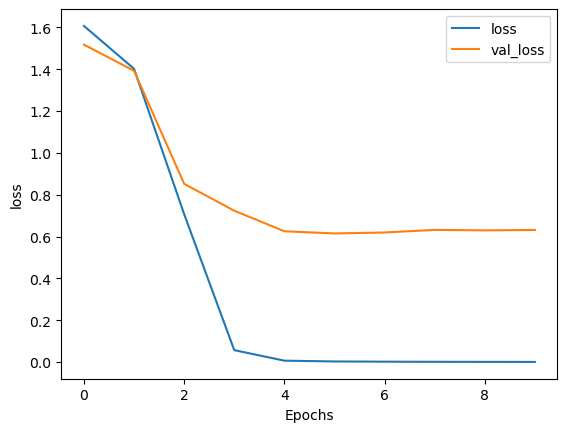

In [21]:
plot_graphs(history, "accuracy")
plot_graphs(history, 'loss')